In [2]:
print("test")

test


In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import os

In [6]:
import matplotlib.pyplot as plt

In [7]:
os.chdir("/home/trevor/Documents/GitHub/procyonDossier/")

In [8]:
report = pd.read_csv('report.csv')

In [9]:
report.shape

(1001, 16)

# This is a heading
## This is a subheading!

This is normal text!
*** I'm excited!! ***

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

In [10]:
name = report["First Name"]

In [11]:
name.describe()

count      1001
unique      942
top       Blair
freq          3
Name: First Name, dtype: object

In [12]:
doctors = report["Attnd. Phys."]

In [13]:
doctors.describe()

count     1001
unique       6
top        Lee
freq       177
Name: Attnd. Phys., dtype: object

Given that there are only 6 attending phys., there is probably only one hospital. It's called "central" so we'll assume that it is between the river and the park.

In [14]:
sectors = report['Sector']

In [15]:
sectors.describe()

count          1001
unique           18
top       Sector 22
freq            116
Name: Sector, dtype: object

- Sector 22 is the most infected! 
- There are only patients from 18 unique sectors...


In [16]:
sector_names = [sector for sector in np.unique(sectors)]

In [17]:
sector_names

['Sector 10',
 'Sector 11',
 'Sector 12',
 'Sector 15',
 'Sector 18',
 'Sector 19',
 'Sector 20',
 'Sector 21',
 'Sector 22',
 'Sector 23',
 'Sector 24',
 'Sector 25',
 'Sector 26',
 'Sector 30',
 'Sector 31',
 'Sector 6',
 'Sector 7',
 'Sector 8']

<img src="./procyon_city.png">

In [22]:
report["Admission"].unique()

array(['2018-03-08', '2018-03-09', '2018-03-10', '2018-03-11',
       '2018-03-12', '2018-03-06', '2018-03-07', '2018-03-05',
       '2018-03-13', '2018-03-04'], dtype=object)

In [26]:
report.where(report["Admission"] == '2018-03-04').groupby("Sector").size()

Sector
Sector 26    1
dtype: int64

In [27]:
report[report["Admission"]=='2018-03-04']

,First Name,Last Name,SIN,Gender,Sector,Age,Admission,Profession,Status,DOD,Donor?,Chaplin Service,Meal Pref,ROOM,DNR?,Attnd. Phys.
773,DeVoulier,Lila,NaN,Female,Sector 26,12,2018-03-04,NaN,ALIVE,NaN,False,NaN,NaN,A7,False,White


The afforementioned is the earliest recorded infected -- we assume patient 0.
- Named Lila DeVoulier
- Female
- Aged 12
- Patient reports from sector 26.
- Maybe immigrant? No SIN.

In [34]:
report["DOD"].unique()

array(['2018-03-09', nan, '2018-03-10', '2018-03-11', '2018-03-13',
       '2018-03-12', '2018-03-14', '2018-03-08', '2018-03-15',
       '2018-03-07', '2018-03-06', '2018-03-05', '2018-03-16'],
      dtype=object)

We may assume at most that the earliest submission data was March 16th 2018 -- being that this is the last reported date.

In [36]:
report[report["SIN"].isnull()]

,First Name,Last Name,SIN,Gender,Sector,Age,Admission,Profession,Status,DOD,Donor?,Chaplin Service,Meal Pref,ROOM,DNR?,Attnd. Phys.
773,DeVoulier,Lila,NaN,Female,Sector 26,12,2018-03-04,NaN,ALIVE,NaN,False,NaN,NaN,A7,False,White
788,Moises,Heskey,NaN,Male,Sector 26,0,2018-03-08,NaN,DECEASED,2018-03-08,False,Muslim,NaN,A14,True,Lee


In [37]:
report[report["Last Name"]=="Heskey"]

,First Name,Last Name,SIN,Gender,Sector,Age,Admission,Profession,Status,DOD,Donor?,Chaplin Service,Meal Pref,ROOM,DNR?,Attnd. Phys.
788,Moises,Heskey,NaN,Male,Sector 26,0,2018-03-08,NaN,DECEASED,2018-03-08,False,Muslim,NaN,A14,True,Lee


In [39]:
report[report["Last Name"]=="Lila"]

,First Name,Last Name,SIN,Gender,Sector,Age,Admission,Profession,Status,DOD,Donor?,Chaplin Service,Meal Pref,ROOM,DNR?,Attnd. Phys.
773,DeVoulier,Lila,NaN,Female,Sector 26,12,2018-03-04,NaN,ALIVE,NaN,False,NaN,NaN,A7,False,White


We have found that there are two people without a SIN -- both are from sector 26, and both are children. We were not able to identify any relations that were admitted. 

DeVoulier Lila - Aged 12, Female > Patient Zero, alive

Moises Heskey -- Aged 0, Male, deceased

In [42]:
report["Age "].describe()

count    1001.000000
mean       47.835165
std        28.062498
min         0.000000
25%        22.000000
50%        49.000000
75%        73.000000
max        96.000000
Name: Age , dtype: float64

In [43]:
report.hist(column="Age ", figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7117dee80>]],
      dtype=object)

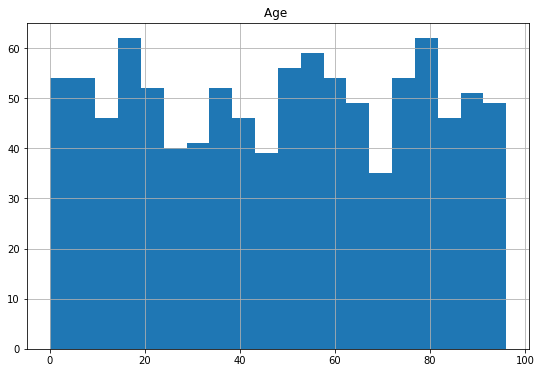

In [44]:
plt.show()

In [50]:
report["Gender"].describe()

count       1001
unique         2
top       Female
freq         501
Name: Gender, dtype: object

Looking at age and gender of admitted patients does not appear to reveal anything statistically significant.

In [52]:
report["Gender"].where(report["Status"]=="DECEASED").describe()

count        518
unique         2
top       Female
freq         262
Name: Gender, dtype: object

52% of infected female are dead. 

51% of infected males are dead.

In [55]:
report["Sector"].value_counts()

Sector 22    116
Sector 24    105
Sector 21     94
Sector 23     92
Sector 25     80
Sector 19     70
Sector 8      49
Sector 11     48
Sector 6      42
Sector 30     40
Sector 20     39
Sector 12     37
Sector 31     35
Sector 7      34
Sector 18     33
Sector 15     30
Sector 10     29
Sector 26     28
Name: Sector, dtype: int64

In [57]:
report["Sector"].where(report["Status"] == "DECEASED").value_counts()

Sector 22    62
Sector 21    51
Sector 24    50
Sector 23    50
Sector 25    38
Sector 19    34
Sector 8     30
Sector 11    27
Sector 18    22
Sector 31    21
Sector 12    20
Sector 20    20
Sector 6     20
Sector 7     17
Sector 26    16
Sector 30    16
Sector 15    12
Sector 10    12
Name: Sector, dtype: int64